In [16]:
tz_data = '''
# tmo     ref_shci      hf          ccsd        ccsd(t)          afqmc/hf                    afqmc/cisd                      afqmc_pt                afqmc_pt2
  CrO   -102.7187   -101.90896  -102.66661  -102.707942     -102.714318 +/- 0.000665    -102.713080 +/- 0.000644    -102.706890 +/- 0.000540    -102.713670 +/- 0.000461
  CuO   -213.3778   -212.24921  -213.33431  -213.374845     -213.386055 +/- 0.001291    -213.375776 +/- 0.000906    -213.369644 +/- 0.001025    -213.365925 +/- 0.001317
  FeO   -139.6355   -138.73002  -139.58107  -139.627617     -139.629155 +/- 0.000836    -139.628523 +/- 0.000967    -139.627692 +/- 0.001786    -139.629181 +/- 0.000783
  MnO   -120.0293   -119.20732  -119.98457  -120.019560     -120.041041 +/- 0.000838    -120.028179 +/- 0.000691    -120.020474 +/- 0.000605    -120.026081 +/- 0.000554
  ScO   -62.5301    -61.834217  -62.489503  -62.5275879     -62.532127 +/- 0.000898     -62.528023 +/- 0.000600     -62.524376 +/- 0.000740     -62.521878 +/- 0.001075
  TiO   -74.0309    -73.281650  -73.984853  -74.0271562     -74.027715 +/- 0.000897     -74.028086 +/- 0.000487     -74.023285 +/- 0.000635     -74.020316 +/- 0.001300
   VO   -87.2353    -86.428704  -87.183407  -87.2267599     -87.226943 +/- 0.002267     -87.228928 +/- 0.001073     -87.227593 +/- 0.000757     -87.225908 +/- 0.001006
'''

In [17]:
tz_dict = {}
for line in tz_data.splitlines():
    if not line.startswith('#') and len(line) > 0:
        parts = line.split()
        tmo = parts[0]
        tz_dict[tmo] = {}
        tz_dict[tmo]['ref'] = parts[1]
        tz_dict[tmo]['hf'] = parts[2]
        tz_dict[tmo]['ccsd'] = parts[3]
        tz_dict[tmo]['ccsd_t'] = parts[4]
        tz_dict[tmo]['afqmc_hf'] = parts[5]
        tz_dict[tmo]['afqmc_hf_err'] = parts[7]
        tz_dict[tmo]['afqmc_cisd'] = parts[8]
        tz_dict[tmo]['afqmc_cisd_err'] = parts[10]
        tz_dict[tmo]['afqmc_ccpt'] = parts[11]
        tz_dict[tmo]['afqmc_ccpt_err'] = parts[13]
        tz_dict[tmo]['afqmc_ccpt2'] = parts[14]
        tz_dict[tmo]['afqmc_ccpt2_err'] = parts[16]

In [18]:
import numpy as np
tmos = []
for item in tz_dict.items():
    tmos = np.hstack((tmos,item[0]))
print(tmos)

['CrO' 'CuO' 'FeO' 'MnO' 'ScO' 'TiO' 'VO']


In [25]:
ref = []
ccsd_t = []
afqmc_hf = []
afqmc_cisd = []
afqmc_ccpt = [] 
afqmc_ccpt2 = []
for tmo in tmos:
    ref = np.hstack((ref,tz_dict[tmo]['ref'])).astype(float)
    ccsd_t = np.hstack((ccsd_t,tz_dict[tmo]['ccsd_t'])).astype(float)
    afqmc_hf = np.hstack((afqmc_hf,tz_dict[tmo]['afqmc_hf'])).astype(float)
    afqmc_cisd = np.hstack((afqmc_cisd,tz_dict[tmo]['afqmc_cisd'])).astype(float)
    afqmc_ccpt = np.hstack((afqmc_ccpt,tz_dict[tmo]['afqmc_ccpt'])).astype(float)
    afqmc_ccpt2 = np.hstack((afqmc_ccpt2,tz_dict[tmo]['afqmc_ccpt2'])).astype(float)

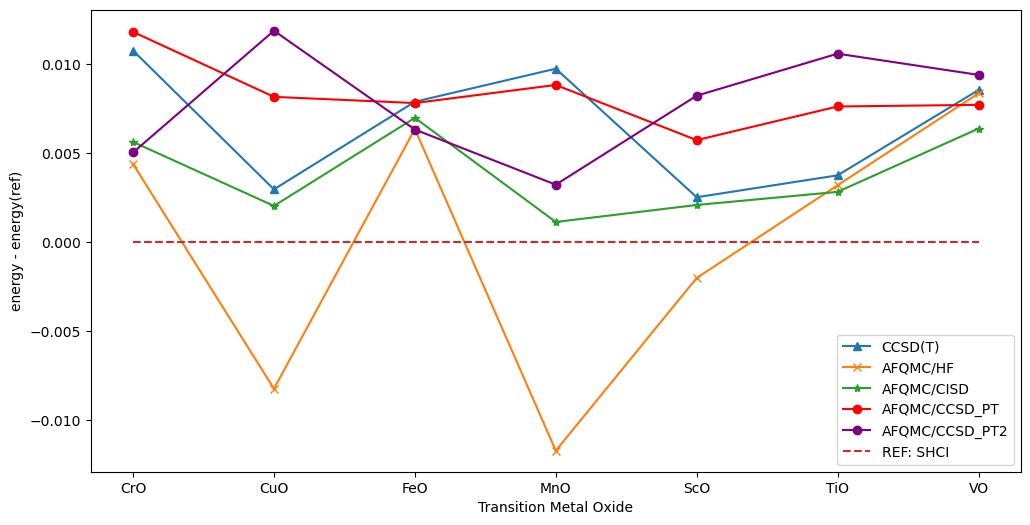

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(tmos,ccsd_t-ref,'^-',label='CCSD(T)')
plt.plot(tmos,afqmc_hf-ref,'x-',label='AFQMC/HF')
plt.plot(tmos,afqmc_cisd-ref,'*-',label='AFQMC/CISD')
plt.plot(tmos,afqmc_ccpt-ref,'o-',color='red',label='AFQMC/CCSD_PT')
plt.plot(tmos,afqmc_ccpt2-ref,'o-',color='purple',label='AFQMC/CCSD_PT2')
plt.plot(tmos,[0]*len(tmos),'--',label='REF: SHCI')
plt.xlabel('Transition Metal Oxide')
plt.ylabel('energy - energy(ref)')
plt.legend()
plt.show()